<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Building_the_Drift_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

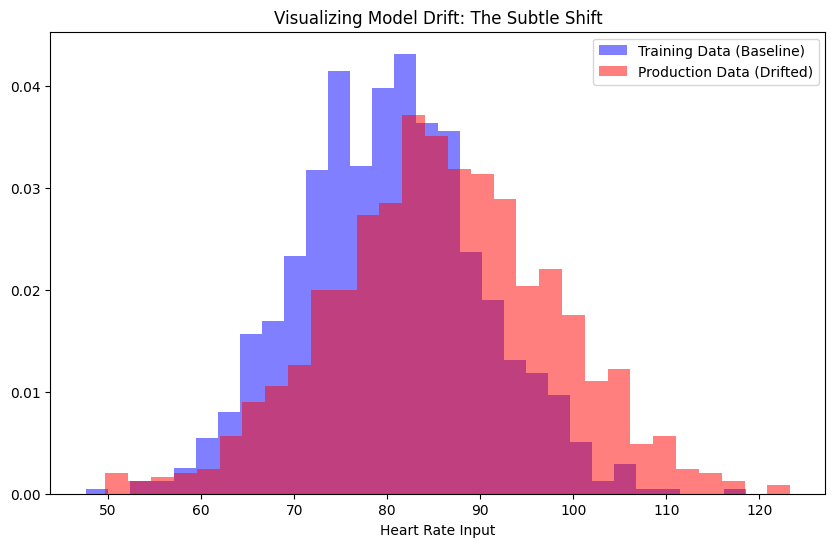

KS Statistic: 0.2310
P-Value: 0.0000000000
🚨 ALERT: DATA DRIFT DETECTED! 🚨
ACTION: INITIATE KILL SWITCH. STOP THE MODEL.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

np.random.seed(42)

# 1. The "Training" Data (January - Normal Operations)
# Heart Rate is normally distributed around 80 bpm
train_hr = np.random.normal(loc=80, scale=10, size=1000)

# 2. The "Drifted" Data (June - The 'New Scanner' or 'New Protocol')
# Suddenly, the average HR shifts to 85 bpm (maybe the triage nurse changed measurement technique?)
# This is subtle! Hard to see with the naked eye.
production_hr = np.random.normal(loc=85, scale=12, size=1000)

# Visualize the Drift
plt.figure(figsize=(10, 6))
plt.hist(train_hr, alpha=0.5, label='Training Data (Baseline)', color='blue', bins=30, density=True)
plt.hist(production_hr, alpha=0.5, label='Production Data (Drifted)', color='red', bins=30, density=True)
plt.title("Visualizing Model Drift: The Subtle Shift")
plt.xlabel("Heart Rate Input")
plt.legend()
plt.show()

# Step 2: The "Silent Failure" If you feed this drifted data into a static model, it won't crash. It will just be wrong.
# •	If the model expects HR 80 = Normal...
# •	And now the average is 85...
# •	It might start classifying "Normal" people as "Tachycardic."
# Step 3: The KS Test (The Alarm System) The KS Test gives us a P-Value.
# •	P > 0.05: The data is likely the same. (Safe).
# •	P < 0.05: The data is significantly different. (DRIFT ALERT).

# Run the Kolmogorov-Smirnov Test
statistic, p_value = ks_2samp(train_hr, production_hr)

print(f"KS Statistic: {statistic:.4f}")
print(f"P-Value: {p_value:.10f}")

# The Kill Switch Logic
ALPHA = 0.05
if p_value < ALPHA:
    print("🚨 ALERT: DATA DRIFT DETECTED! 🚨")
    print("ACTION: INITIATE KILL SWITCH. STOP THE MODEL.")
else:
    print("✅ System Stable. Model continues.")